This is a version of the `solution-base` notebook that allows for iterating automatically through multiple settings based on the values in an Excel spreadsheet.

It is recommended that you fully understand `solution-base` before implementing this automated version.

# Imports

In [71]:
%load_ext autoreload
%autoreload 2

import cs7641assn4 as a4
import numpy as np
import pandas as pd
import warnings
import xlrd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
pd.set_option('expand_frame_repr', True)
pd.set_option("display.max_rows", 200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
def plot_convergence(vi_epochs, pi_epochs, q_epochs):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 10))
    ax1.plot(vi_epochs['time'], vi_epochs['delta'], label='vi')
    ax1.plot(pi_epochs['time'], pi_epochs['delta'], label='pi')
    ax1.set_ylabel('V_sum')
    ax1.set_xlabel('time')
    ax1.legend()
    
    ax3.plot(q_epochs['time'], q_epochs['max_q'], label='q')
    ax3.set_ylabel('Q_max')
    ax3.set_xlabel('time')
    ax3.legend()
    
    ax2.plot(vi_epochs.index, vi_epochs['delta'], label='vi')
    ax2.plot(pi_epochs.index, pi_epochs['delta'], label='pi')
    ax2.set_ylabel('V_sum')
    ax2.set_xlabel('epoch')
    ax2.legend()

    ax4.plot(q_epochs.index, q_epochs['max_q'], label='q')
    ax4.set_ylabel('Q_max')
    ax4.set_xlabel('epoch')
    ax4.legend()
    
# Value Iteration
def perform_value_iteration(env, opt, print_arrows=True):    
    vi_V, vi_epochs = a4.valueIteration(env, opt['epsilon'], opt['gamma'], opt['max_iter'], report=opt['report'])

    vi_policy = a4.value_to_policy(env, V=vi_V, gamma=opt['gamma'])
    
    if print_arrows:
        vi_policy_arrows = a4.print_policy(vi_policy, width=opt['size'], height=opt['size'])

    if opt['display_print'] and print_arrows:
        # display value function:
        print('\n--Value Iteration Values in grid order--')
        a4.matprint(a4.print_value(vi_V, width=opt['size'], height=opt['size']))
        
        # display policy
        print('\n--Value Iteration Policy Matrix--')
        a4.matprint(vi_policy_arrows)
    return vi_V, vi_epochs, vi_policy, vi_policy_arrows
        
# Policy Iteration
def perform_policy_iteration(env, opt):
    pi_V, pi_policy, pi_epochs = a4.policy_iteration(env, opt['epsilon'], opt['gamma'], opt['max_iter'], report=opt['report'])
    
    pi_policy_arrows = a4.print_policy(pi_policy, width=opt['size'], height=opt['size'])

    if opt['display_print']:
        # Display values
        print('\n--Policy Iteration Values in grid order--')
        a4.matprint(a4.print_value(pi_V, width=opt['size'], height=opt['size']))

        # Display policy
        print('\n--Policy Iteration Policy Matrix--')
        a4.matprint(pi_policy_arrows)
    return pi_V, pi_epochs, pi_policy, pi_policy_arrows
        
# Q Learning
def perform_q_learning(env, opt):     
    Q, Q_epochs = a4.Qlearning(env, opt['qepsilon'], opt['lr'], opt['qgamma'], opt['max_iter'], opt['episodes'], 
                                     opt['initial'], opt['decay'], report=opt['report'])
    
#     plot_convergence(Q_epochs, opt, 'q')

    maxQ = np.max(Q,axis=1)

    Q_policy = a4.Q_to_policy(Q)

    Q_policy_arrows = a4.print_policy(Q_policy, width=opt['size'], height=opt['size'])

    if opt['display_print']: 
#         print('--Q with all options--')
#         a4.matprint(Q)
        print('\n--argmax(Q) in grid order--')
        a4.matprint(a4.print_value(maxQ, width=opt['size'], height=opt['size']))
        print('\n--Q-Learning Policy Matrix--')
        a4.matprint(Q_policy_arrows)
    return Q, Q_epochs, maxQ, Q_policy, Q_policy_arrows 

# Create Environment
def create_env(opt):

    map_name = 'x'.join([str(opt['size'])]*2) # None, if you want a random map
    env = a4.getEnv(env_id='hw4-FrozenLake-v0', rH=opt['rH'], rG=opt['rG'], rF=opt['rF'], 
                    size=opt['size'],  
                    is_slippery=opt['is_slippery'], render_initial=opt['render_initial'])

    # Store a representation of the map
    env_desc = env.desc.astype('<U8')

    # Store a representation of the state rewards
    env_rs = a4.getStateReward(env)

    if opt['display_print']:
        # Display reward at each state
        print('\n--Reward Values at Each State--')
        a4.matprint(a4.print_value(env_rs, width=opt['size'], height=opt['size']))
    return env, env_desc, env_rs

def heat(arrows, values, size, ax, title):
    sns.heatmap(values.reshape(size,size), annot=arrows.reshape(size,size), linewidths=.5, fmt='', ax=ax).set_title(title)

Empty DataFrame
Columns: [rH, rG, rF, size, p, is_slippery, render_initial, epsilon, gamma, max_iter, qepsilon, lr, qgamma, episodes, initial, decay, report, display_print, enabled]
Index: []
    rH   rG   rF  size    p  is_slippery  render_initial  epsilon  gamma  max_iter  qepsilon   lr  qgamma  episodes  initial  decay  report  display_print  enabled
0   -1    1 -0.1     4  0.8        False            True        0    0.8       100         1  0.8    0.95       250        0   True    True           True     True
1 -100  100 -0.1    20  0.8        False            True        0    0.8       100         1  0.8    0.95       250        0   True    True           True     True
--Board--

SFFF
FFFF
FFFF
HFHG

--Actions for Position to the Left of the Goal--
{0: [(1.0, 14, -1, True)],
 1: [(1.0, 14, -1, True)],
 2: [(1.0, 14, -1, True)],
 3: [(1.0, 14, -1, True)]}

--Reward Values at Each State--
-0.1  -0.1  -0.1  -0.1  
-0.1  -0.1  -0.1  -0.1  
-0.1  -0.1  -0.1  -0.1  
  -1  -0.1    -1   

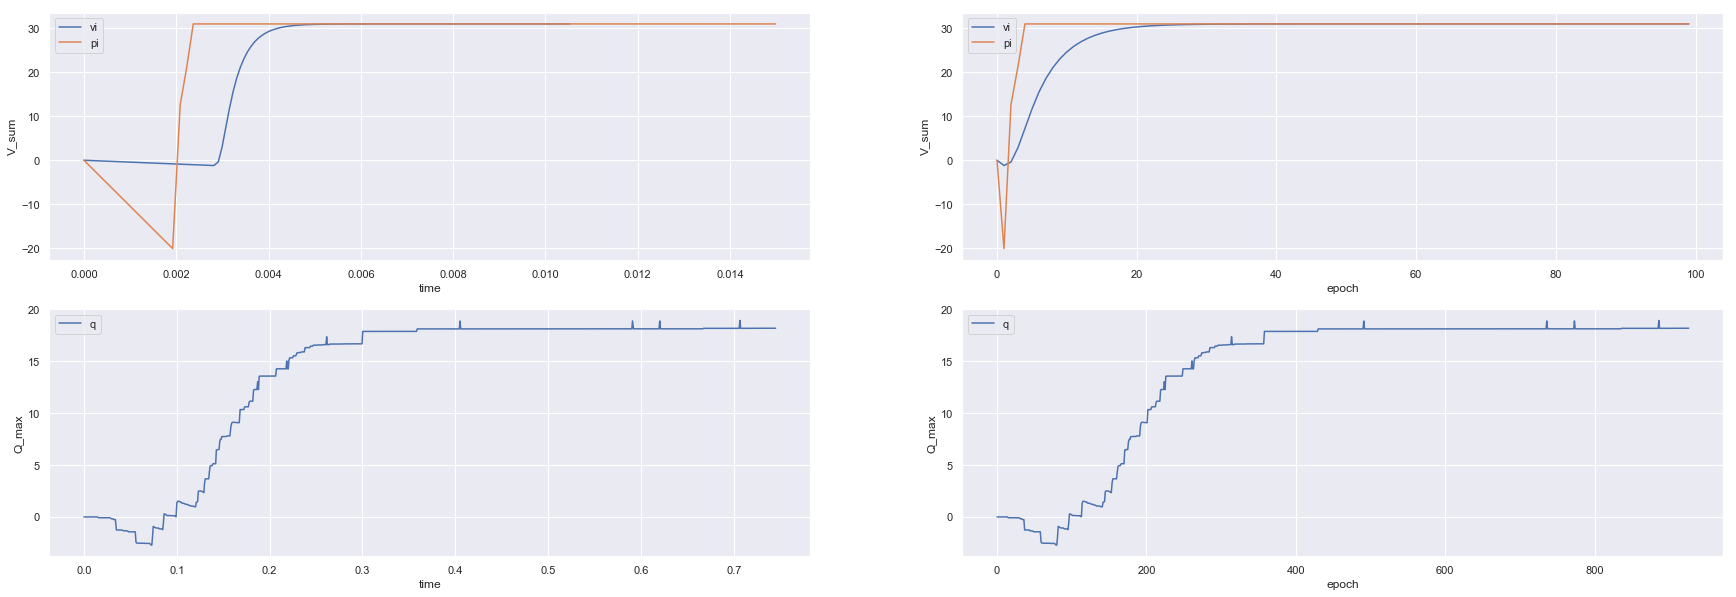

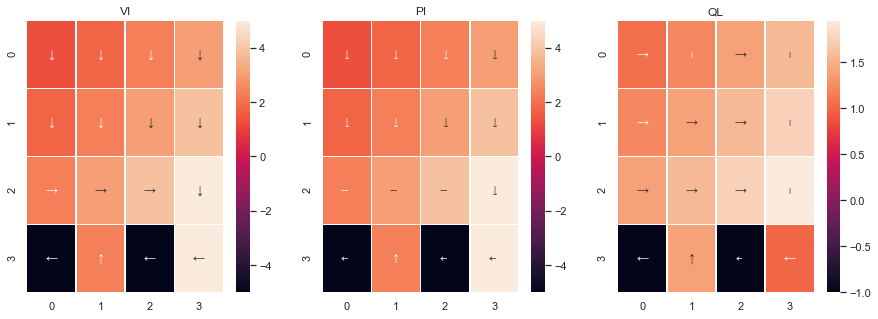

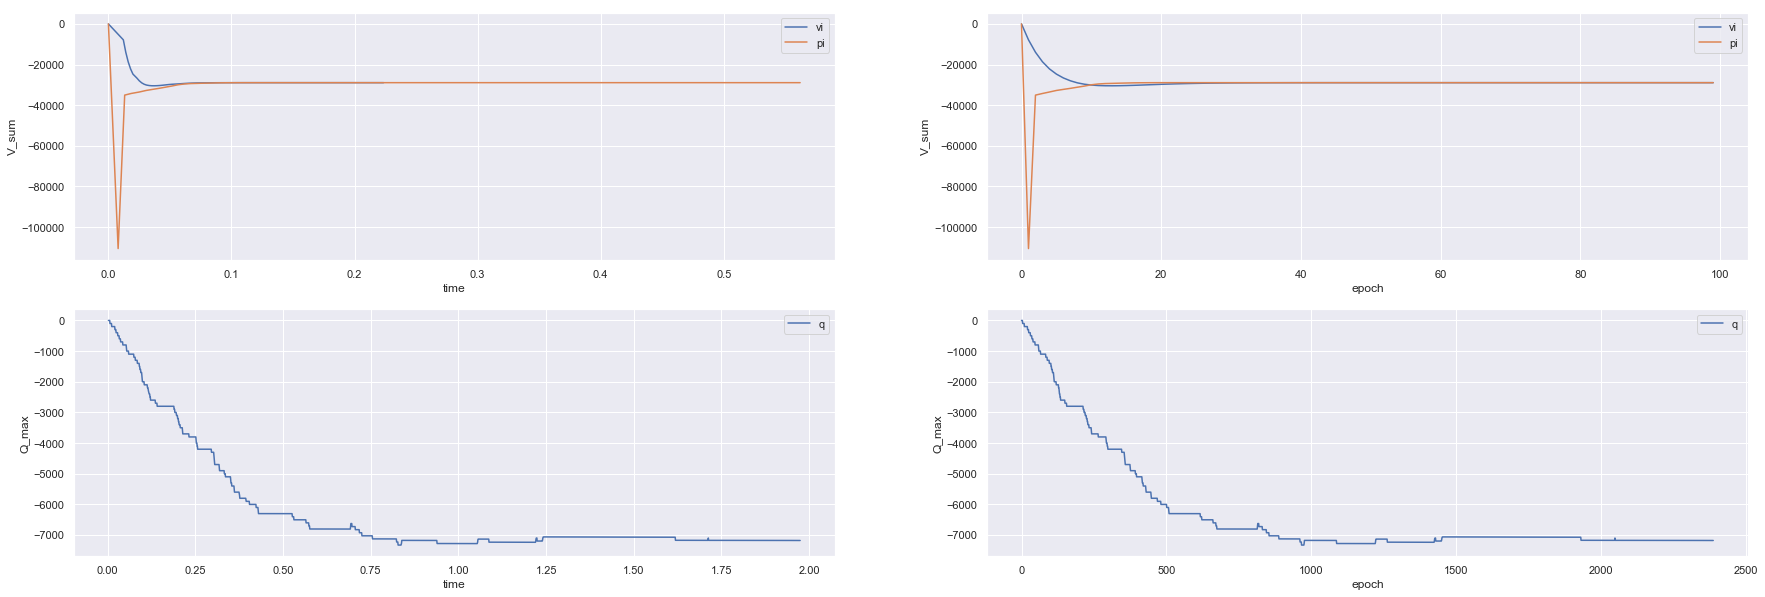

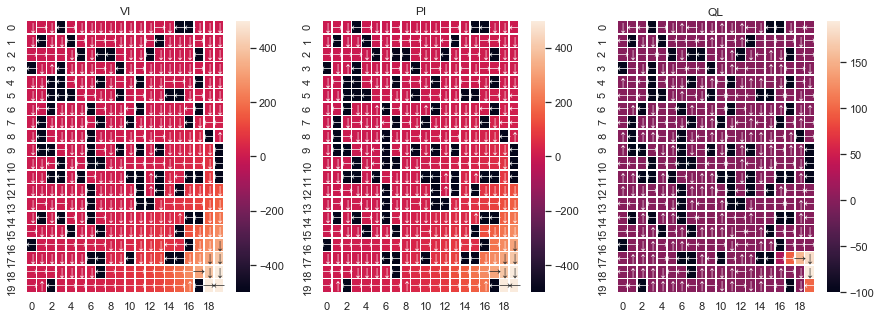

In [76]:


# Import settings, uncomment to read settings from an excel spreadsheet
settings = pd.read_excel('default_settings.xlsx')
print(settings.loc[settings['enabled']=='True'])
results = None
print(settings.head())
for i, opt in settings.iterrows():
    if not opt['enabled']: continue
    
    env, env_desc, env_rs = create_env(opt)
    vi_V, vi_epochs, vi_policy, vi_policy_arrows = perform_value_iteration(env, opt)
    pi_V, pi_epochs, pi_policy, pi_policy_arrows = perform_policy_iteration(env, opt)
    Q, Q_epochs, maxQ, Q_policy, Q_policy_arrows  = perform_q_learning(env, opt)
    plot_convergence(vi_epochs, pi_epochs, Q_epochs)
#     plt.figure()
    f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 5))
    heat(vi_policy_arrows, vi_V, opt['size'], ax1, 'VI')
    heat(pi_policy_arrows, pi_V, opt['size'], ax2, 'PI')
    heat(Q_policy_arrows, maxQ, opt['size'], ax3, 'QL')
    


# Notes


In [50]:
print(Q)
max_Q = np.max(Q,axis=1)
print(max_Q)
print(max_Q.sum())
# pprint(Q)
# print(Q_epochs)
# print([r.max() for r in Q])
# print(np.mean([r.max() for r in Q]))



[[-1.90277659 -1.89834315 -1.60980447 -1.89948548]
 [-1.89516647 -1.51454753 -1.89146999 -1.89155175]
 [-0.53739777 -1.91831509 -1.9309025  -1.93548497]
 [-1.         -1.         -1.         -1.        ]
 [-1.94009725 -1.92935129 -1.93737838 -1.56499162]
 [-1.9185933  -1.90536944 -1.91844726 -1.38449191]
 [-1.88292673 -1.89417747 -1.8841856   0.70811671]
 [-1.872       1.64728925 -1.83899122 -1.89652827]
 [-1.         -1.         -1.         -1.        ]
 [-1.95077634 -1.95199564 -1.9510844  -1.938675  ]
 [-1.         -1.         -1.         -1.        ]
 [-1.25926608 -1.62592     1.94179939 -1.62017597]
 [-1.95690024 -1.95659758 -1.95801859 -1.88704119]
 [-1.95550575 -1.95609974 -1.93285744 -1.95580714]
 [-1.         -1.         -1.         -1.        ]
 [ 1.          1.          1.          1.        ]]
[-1.60980447 -1.51454753 -0.53739777 -1.         -1.56499162 -1.38449191
  0.70811671  1.64728925 -1.         -1.938675   -1.          1.94179939
 -1.88704119 -1.93285744 -1.         

Default rewards in OpenAI gym Frozen-Lake-v0 are 1 for the G(oal) and 0 for everything else.

Maps are drawn according to the following logic

```
if desc and map_name are None, 
   then a default random map is drawn with 8
        using frozen_lake.generate_random_map(size=8, p=0.8)
elif desc is None and a map_name is given
   then a map_name is either '4x4' or '8x8'
        and is drawn from the dict MAPS in frozen_lake.py
elif desc is given
   then it must be in the form of a list with 
```

Default action probabilities are 1/3 chosen action, 1/3 each for right angles to chosen action, and 0 for reverse of chosen action. This is set with `is_slippery=True`. If `is_slippery=False`, then P=1 for chosen action and 0 for all other actions.

|ACTION|Value|Symbol|
|------|-----|------|
|LEFT  | 0   | ←    |
|DOWN  | 1   | ↓    |
|RIGHT | 2   | →    |
|UP    | 3   | ↑    |

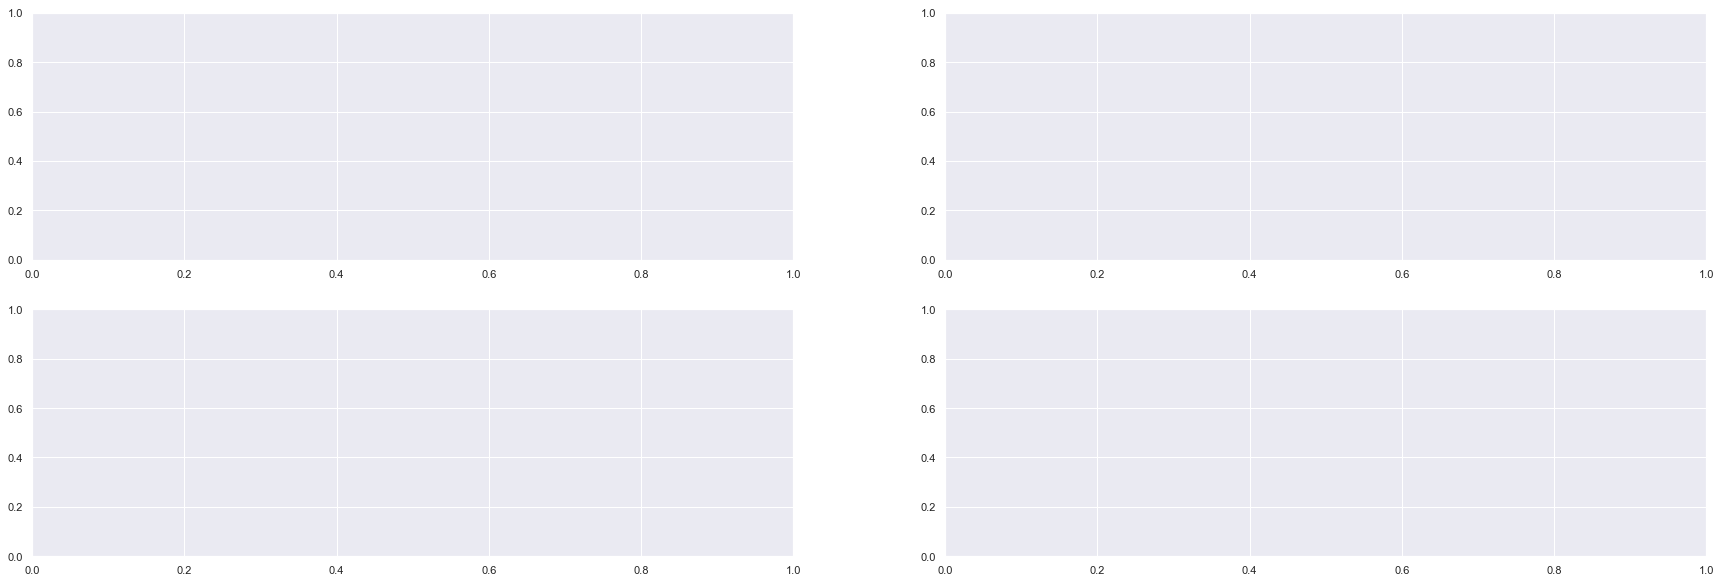

In [19]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 10))





# Sources

- Environment: <https://gym.openai.com/envs/FrozenLake-v0/>
- Code: <https://github.com/Twice22/HandsOnRL>
- Tutorial: <https://twice22.github.io/>